<a href="https://colab.research.google.com/github/Inha-AI/DACON-semiconductor-competition/blob/feature%2FYoonSungLee/submission_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=1e3f4940050b0d2a8a9cb167a91fba4ef0238f6fd2d99f4fc2b59fd8697f3669
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# 데이터 자료형을 적절히 변형시켜 데이터의 크기를 줄이는 방법

# for col in df_train.columns:
#     col_type = df_train[col].dtypes
#     min1 = df_train[col].min()
#     max1 = df_train[col].max()
#     if str(col_type)[:3] == 'int':
#         df_train[col] = df_train[col].astype(np.int16)
#     else:
#         if min1 > np.finfo(np.float16).min and max1 < np.finfo(np.float16).max:
#             df_train[col] = trdf_trainain[col].astype(np.float16)
#         elif min1 > np.finfo(np.float32).min and max1 < np.finfo(np.float32).max:
#             df_train[col] = df_train[col].astype(np.float32)
#         else:
#             df_train[col] = df_train[col].astype(np.float64)

In [0]:
df_train = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/test.csv')

In [0]:
# 독립변수와 종속변수를 분리합니다.

train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

In [0]:
# train set을 shuffle하여 다시 train set과 validation set으로 분리합니다.

train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.25)

# Model 12

* 11 layers
* 800 units, he_normal, swish
* BatchNormalization
* Adam(0.001)
* epochs 200
* batch_size 630
<br><br>
* BayesianOptimization을 통해 최적의 units를 도출해 내어 적용

In [0]:
# 케라스를 통해 모델 생성을 시작합니다.

def create_model():
    model = Sequential()
    model.add(Dense(units=800, input_dim=226, kernel_initializer='he_normal'))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation(swish))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation(swish))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation(swish))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation(swish))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(Dense(units=800, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation(swish))
    model.add(Dense(units=4, activation='linear'))

    return model


# Activation Function 정의

def swish(x) :
    return x * keras.activations.sigmoid(x)

In [8]:
model = create_model()

In [9]:
adam = keras.optimizers.Adam(0.001)
model.compile(loss='mae', optimizer=adam, metrics=['accuracy'])

In [10]:
hist = model.fit(train_X, train_Y, epochs=200, batch_size=630,
                    validation_data=(val_X, val_Y))




Train on 607500 samples, validate on 202500 samples
Epoch 1/200





607500/607500 [==============================] - 30s 49us/step - loss: 68.5536 - acc: 0.3582 - val_loss: 55.7735 - val_acc: 0.4257
Epoch 2/200
607500/607500 [==============================] - 19s 31us/step - loss: 31.8944 - acc: 0.6670 - val_loss: 29.1752 - val_acc: 0.7008
Epoch 3/200
607500/607500 [==============================] - 20s 33us/step - loss: 20.2049 - acc: 0.7926 - val_loss: 19.1672 - val_acc: 0.8053
Epoch 4/200
607500/607500 [==============================] - 19s 31us/step - loss: 15.0082 - acc: 0.8438 - val_loss: 14.1090 - val_acc: 0.8472
Epoch 5/200
607500/607500 [==============================] - 19s 31us/step - loss: 12.1089 - acc: 0.8724 - val_loss: 11.7625 - val_acc: 0.8709
Epoch 6/200
607500/607500 [==============================] - 19s 32us/step - loss: 10.3613 - acc: 0.8904 - val_loss: 11.4449 - val_acc: 0.8844
Epoch 7/200
607500/607500 [==============================] - 19s 31us/step - loss:

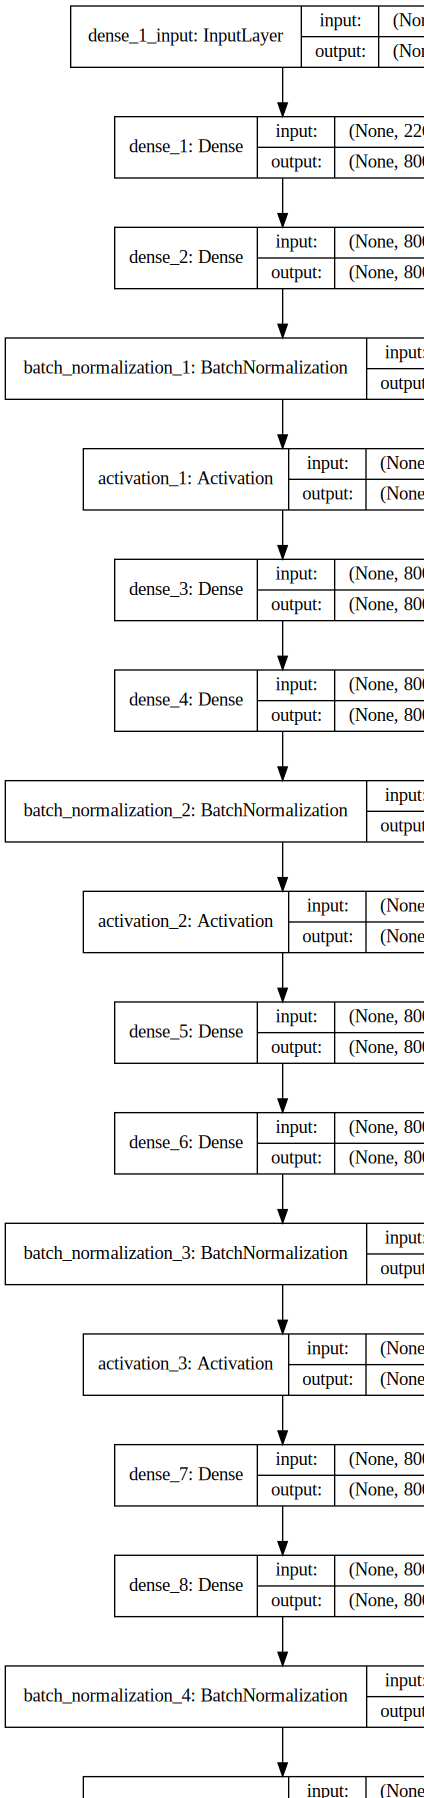

In [12]:
# 모델 아키텍처

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

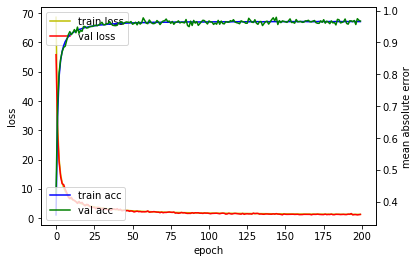

In [13]:
# 학습 과정

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean absolute error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 예측값을 생성합니다.

pred_test = model.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_12.csv')

In [0]:
# 학습된 모델을 저장합니다.

model.save('/gdrive/My Drive/DACON-semiconductor-competition/model_12.h5')

In [18]:
# 추가 학습

hist = model.fit(train_X, train_Y, epochs=100, batch_size=630,
                    validation_data=(val_X, val_Y))

Train on 607500 samples, validate on 202500 samples
Epoch 1/100
607500/607500 [==============================] - 19s 32us/step - loss: 1.3029 - acc: 0.9660 - val_loss: 1.3019 - val_acc: 0.9628
Epoch 2/100
607500/607500 [==============================] - 19s 31us/step - loss: 1.3134 - acc: 0.9657 - val_loss: 1.3008 - val_acc: 0.9572
Epoch 3/100
607500/607500 [==============================] - 19s 31us/step - loss: 1.3144 - acc: 0.9655 - val_loss: 1.3140 - val_acc: 0.9666
Epoch 4/100
607500/607500 [==============================] - 19s 31us/step - loss: 1.3075 - acc: 0.9656 - val_loss: 1.2389 - val_acc: 0.9679
Epoch 5/100
607500/607500 [==============================] - 19s 31us/step - loss: 1.2976 - acc: 0.9657 - val_loss: 1.2241 - val_acc: 0.9606
Epoch 6/100
607500/607500 [==============================] - 18s 30us/step - loss: 1.2949 - acc: 0.9659 - val_loss: 1.1605 - val_acc: 0.9690
Epoch 7/100
607500/607500 [==============================] - 19s 30us/step - loss: 1.2943 - acc: 0.965

In [0]:
# 예측값을 생성합니다.

pred_test = model.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_12_300.csv')

In [0]:
# 학습된 모델을 저장합니다.

model.save('/gdrive/My Drive/DACON-semiconductor-competition/model_12_300.h5')

### Bayesian Optimization
http://research.sualab.com/introduction/practice/2019/02/19/bayesian-optimization-overview-1.html<br>
http://research.sualab.com/introduction/practice/2019/04/01/bayesian-optimization-overview-2.html<br>

### Swish Activation
https://www.machinecurve.com/index.php/2019/05/30/why-swish-could-perform-better-than-relu/#todays-activation-functions